In [13]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

W = 400

In [14]:
def draw_ellipse(img, major_axis_length, angle):
    img[:] = background_image
    thickness = 2
    line_type = 8

    cv.ellipse(img,
               (W // 2, W // 2),
               (major_axis_length, W // 16),
               angle,  # Fixed angle
               0,
               360,
               (255, 0, 0),
               thickness,
               line_type)



In [15]:

background_image = cv.imread('chad.jpg')  # Image file
background_image = cv.resize(background_image, (W, W))  # Resize to W x W

test_image = np.zeros((W, W, 3), dtype=np.uint8)


In [16]:
def display_image(image, title):
    image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)
    plt.imshow(image_rgb)
    plt.title(title)
    plt.axis('off')
    plt.show()

In [17]:
# Function to update the image when the slider value changes
def update_image(major_axis_length, angle):
    draw_ellipse(test_image, major_axis_length, angle)
    display_image(test_image, f"Velikost hlavní osy elypsy {major_axis_length} s úhlem {angle}")

In [19]:
slider = widgets.IntSlider(value=W // 4, min=10, max=W // 2, step=1, description='Hlavní osa')
angle_slider = widgets.IntSlider(value=45, min=0, max=360, step=1, description='Úhel')

# Combine the sliders into a single interactive widget
interactive_plot = widgets.interactive(update_image, major_axis_length=slider, angle=angle_slider)

#display(slider)
#update_image(W // 4)

interactive(children=(IntSlider(value=100, description='Hlavní osa', max=200, min=10), IntSlider(value=45, des…

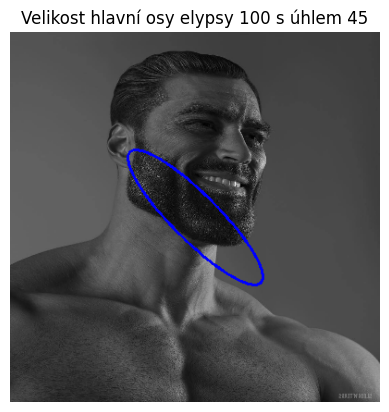

In [20]:
# Display the sliders and the initial plot
display(interactive_plot)

# Initial display
update_image(W // 4, 45)